In [935]:

# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm 
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from sklearn.metrics import r2_score


## Problem 

A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 

To overcome the ongoing challenges posed by Covid, the BookBikes wants to understand the data and factor affecting the demand of these shared bikes.

The company wants to understand below point:
Which variables are significant in predicting the demand for shared bikes.
How well those variables describe the bike demands


Based on the outcome of the analysis, the management of the company will rework on the business strategy to stay afloat in the challenging times.

# Reading and understanding of data

In [936]:
bike_df= pd.read_csv('day.csv')

In [937]:
bike_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [938]:
bike_df.shape

(730, 16)

In [939]:
# Checking for null values
bike_df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [940]:
# renaming the columns to meaningful names
bike_df.rename(columns={'yr':'year','weathersit':'weather_condition',
                          'mnth':'month','temp':'temparature','atemp':'actual_temparature',
                          'hum':'humidity'},inplace=True)

In [941]:
# drop columns those will not aid in the analysis
# instant is a sequence number
# dteday back up is available in month & day
# registered & casual are redundant columns as total count already there in the dataframe
bike_df.drop(['instant','dteday','registered','casual'], axis = 1, inplace = True)

In [942]:
# drop duplicates
bike_df.drop_duplicates(inplace=True)

In [943]:
bike.head()

,year,holiday,workingday,temparature,actual_temparature,humidity,windspeed,cnt,aug,dec,...,sat,sun,thu,tue,wed,clear,misty,spring,summer,winter
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,0,0,...,0,1,0,0,0,0,1,1,0,0
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,0,0,...,0,0,0,0,0,0,1,1,0,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,0,0,...,0,0,0,1,0,1,0,1,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,0,0,...,0,0,0,0,1,1,0,1,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,0,0,...,0,0,1,0,0,1,0,1,0,0


In [944]:
# Encoding/mapping the season column
bike_df.season=bike_df.season.map({1:'spring',2:'summer',3:'fall',4:'winter'})
# Encoding/mapping the month column
bike_df.month=bike_df.month.map({1:'jan',2:'feb',3:'mar',4:'apr',5:'may',6:'jun',7:'jul',8:'aug',9:'sep',10:'oct',11:'nov',12:'dec'})
# Encoding/mapping the weekday column
bike_df.weekday=bike_df.weekday.map({0:'mon',1:'tue',2:'wed',3:'thu',4:'fri',5:'sat',6:'sun'})
# Encoding/mapping the weather condition column
bike_df.weather_condition=bike_df.weather_condition.map({1:'clear',2:'misty',3:'bad_weather',4:'extremly_bad_weather'})


In [945]:
bike_df.head()

,season,year,month,holiday,weekday,workingday,weather_condition,temparature,actual_temparature,humidity,windspeed,cnt
0,spring,0,jan,0,sun,0,misty,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,mon,0,misty,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,tue,1,clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,wed,1,clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,thu,1,clear,9.305237,11.46350,43.6957,12.522300,1600


# Step 2: Visualizing the data

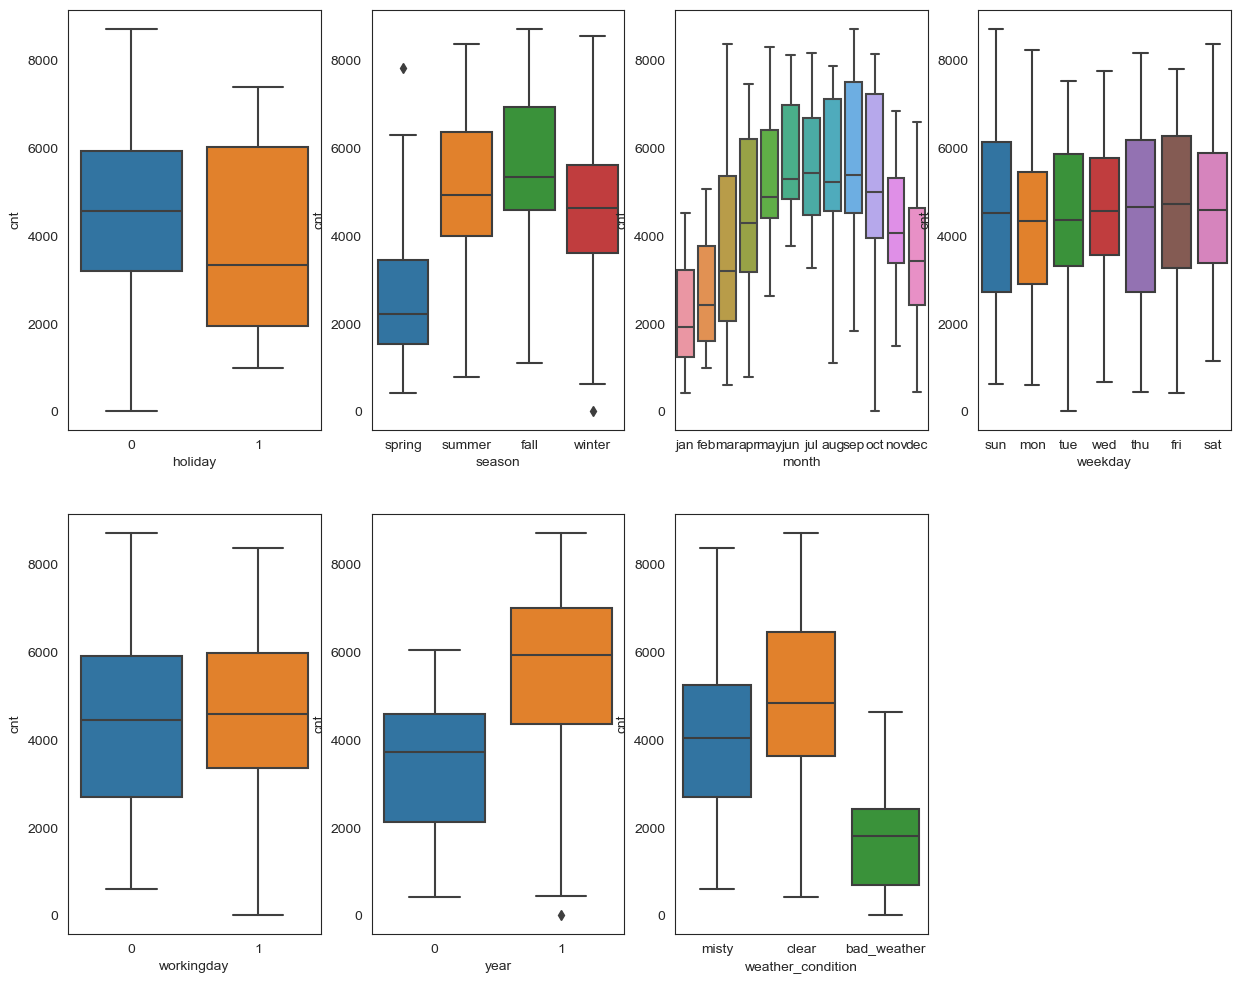

In [946]:
# Visualizing the categorical columns
# to understand the predictor variable behaviour against the target variable 'cnt'

plt.figure(figsize=(15,12))
plt.subplot(2,4,1)
sns.boxplot(x='holiday',y='cnt',data=bike_df)
plt.subplot(2,4,2)
sns.boxplot(x='season',y='cnt',data=bike_df)
plt.subplot(2,4,3)
sns.boxplot(x='month',y='cnt',data=bike_df)
plt.subplot(2,4,4)
sns.boxplot(x='weekday',y='cnt',data=bike_df)
plt.subplot(2,4,5)
sns.boxplot(x='workingday',y='cnt',data=bike_df)
plt.subplot(2,4,6)
sns.boxplot(x='year',y='cnt',data=bike_df)
plt.subplot(2,4,7)
sns.boxplot(x='weather_condition',y='cnt',data=bike_df)
plt.show()

- The demand of the shared bikes surges during the summer and gradually goes down towards the winter
- Clear weather seems to a favorite weather for bike ride
- Demand of the bikes have increased from year 2018 to year 2019 
- The demand pattern seems to be similar for holidays and working days

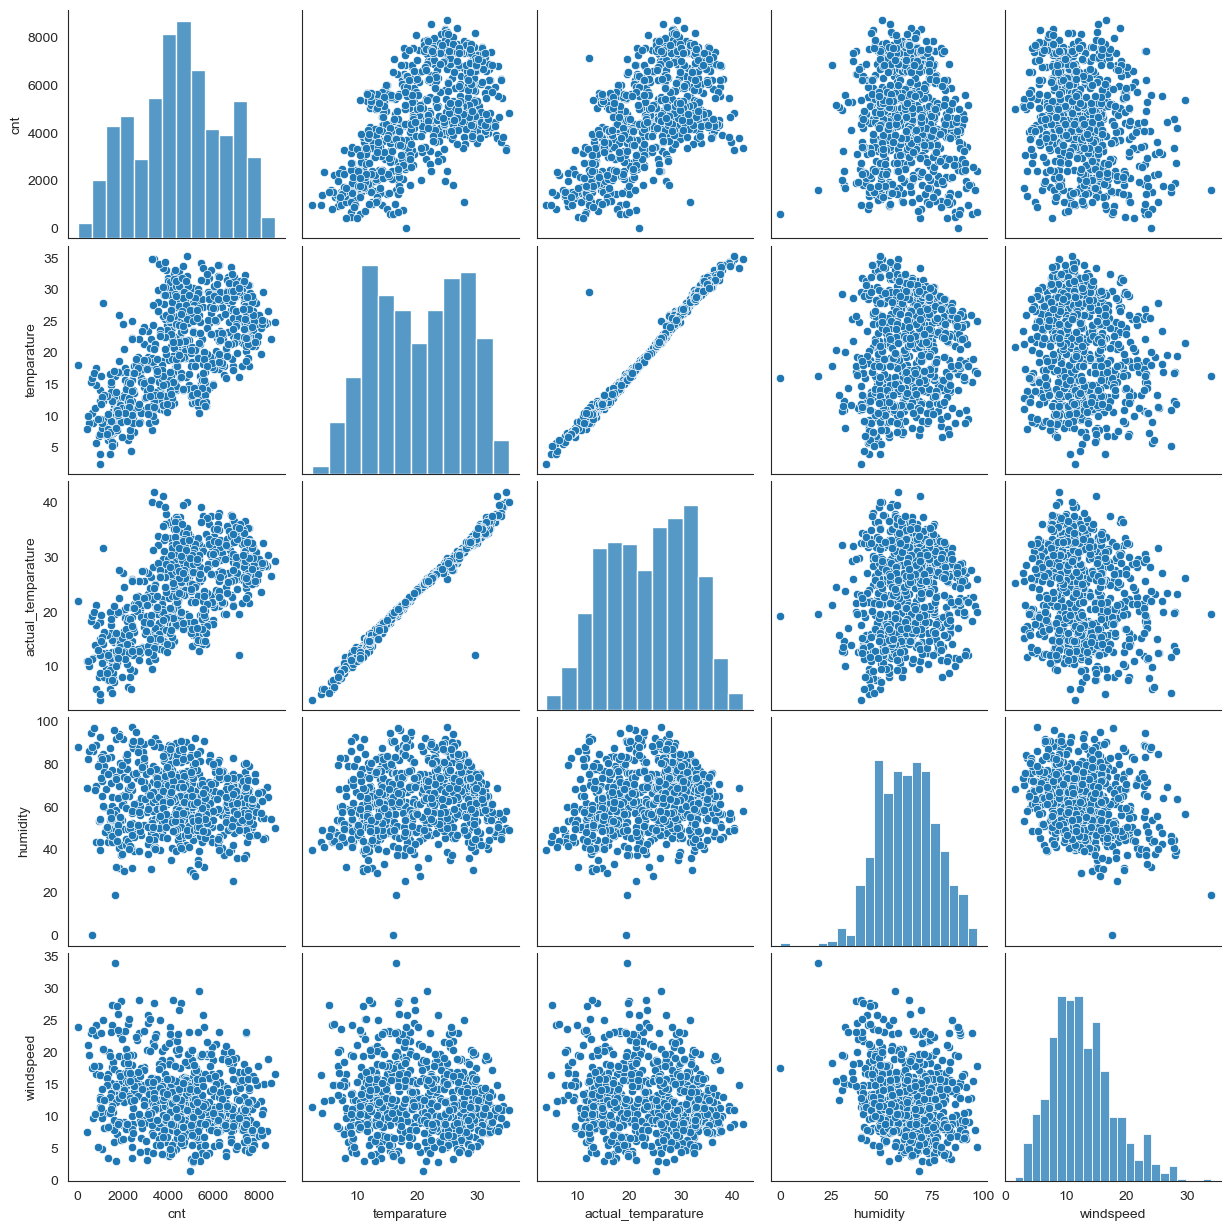

In [947]:
# Visualizing the numerical columns
# to understand the predictor variable behaviour against the target variable 'cnt'
sns.pairplot(data=bike_df,vars=['cnt','temparature','actual_temparature','humidity','windspeed'])
plt.show()

- temparature and actual_temparature have relation with cnt , both cannot be used together during multicolinearity

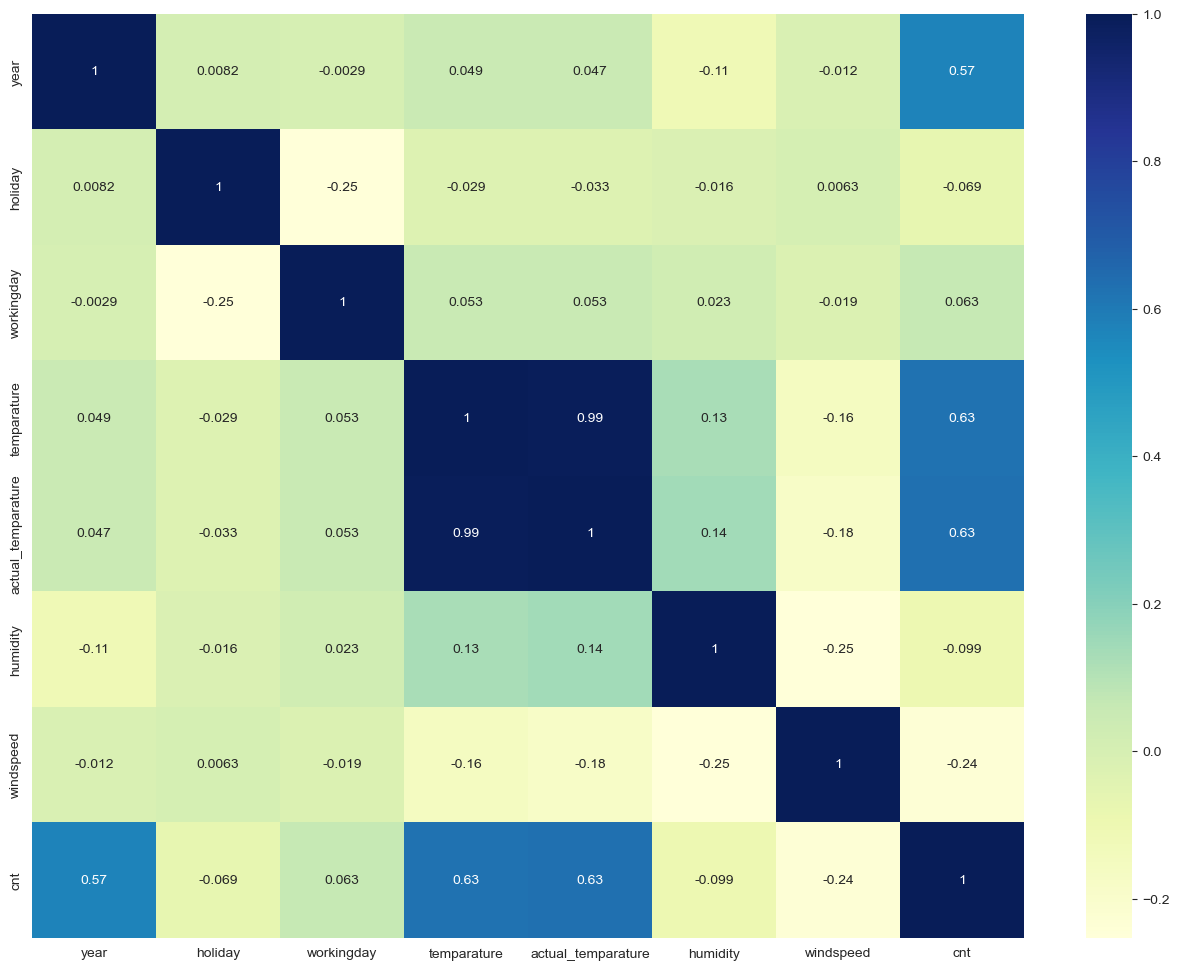

In [948]:
# visualizing the correlation between various numerical columns and target colums 
plt.figure(figsize=(16,12))
sns.heatmap(bike_df.corr(),annot=True,cmap='YlGnBu')
plt.show()

# Step 3: Data Preparation

In [949]:
# getting dummy values for categorical columns

months_df=pd.get_dummies(bike_df.month,drop_first=True)
weekday_df=pd.get_dummies(bike_df.weekday,drop_first=True)
weather_condition_df=pd.get_dummies(bike_df.weather_condition, drop_first=True)
season_df=pd.get_dummies(bike_df.season,drop_first=True)

In [950]:
# concatenating the dummies columns with the bike_df 
bike_df=pd.concat([bike_df,months_df,weekday_df,weather_condition_df,season_df],axis=1)

In [951]:
# dropping the columns for which the dummies value already added 
bike_df.drop(['month','weekday','weather_condition','season'], axis = 1, inplace = True)

In [952]:
bike_df.shape

(730, 30)

# Step 4: Splitting the data into train and test data

In [953]:
# train data percentage will be 70 % 
df_train,df_test=train_test_split(bike_df,train_size=.7, random_state=100)
print(df_train.shape)
print(df_test.shape)

(510, 30)
(220, 30)


In [954]:
# Inspect the train dataframe
df_train.head()

,year,holiday,workingday,temparature,actual_temparature,humidity,windspeed,cnt,aug,dec,...,sat,sun,thu,tue,wed,clear,misty,spring,summer,winter
576,1,0,1,29.246653,33.1448,70.4167,11.083475,7216,0,0,...,0,0,0,0,1,1,0,0,0,0
426,1,0,0,16.980847,20.6746,62.1250,10.792293,4066,0,0,...,0,1,0,0,0,0,1,1,0,0
728,1,0,0,10.489153,11.5850,48.3333,23.500518,1796,0,1,...,0,0,0,0,0,1,0,1,0,0
482,1,0,0,15.443347,18.8752,48.9583,8.708325,4220,0,0,...,0,1,0,0,0,0,1,0,1,0
111,0,0,1,13.803347,16.0977,72.9583,14.707907,1683,0,0,...,1,0,0,0,0,0,1,0,1,0


In [955]:
# Numerical columns
num_vars=['temparature','actual_temparature','humidity','windspeed','cnt']

In [956]:
# Scaling the numerical columns on a uniform scale for better readability 

scaler=MinMaxScaler()
df_train[num_vars]=scaler.fit_transform(df_train[num_vars])
df_train.head()

,year,holiday,workingday,temparature,actual_temparature,humidity,windspeed,cnt,aug,dec,...,sat,sun,thu,tue,wed,clear,misty,spring,summer,winter
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,...,0,0,0,0,1,1,0,0,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,0,0,...,0,1,0,0,0,0,1,1,0,0
728,1,0,0,0.245101,0.200348,0.498067,0.663106,0.204096,0,1,...,0,0,0,0,0,1,0,1,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,0,...,0,1,0,0,0,0,1,0,1,0
111,0,0,1,0.345824,0.318819,0.751824,0.380981,0.191095,0,0,...,1,0,0,0,0,0,1,0,1,0


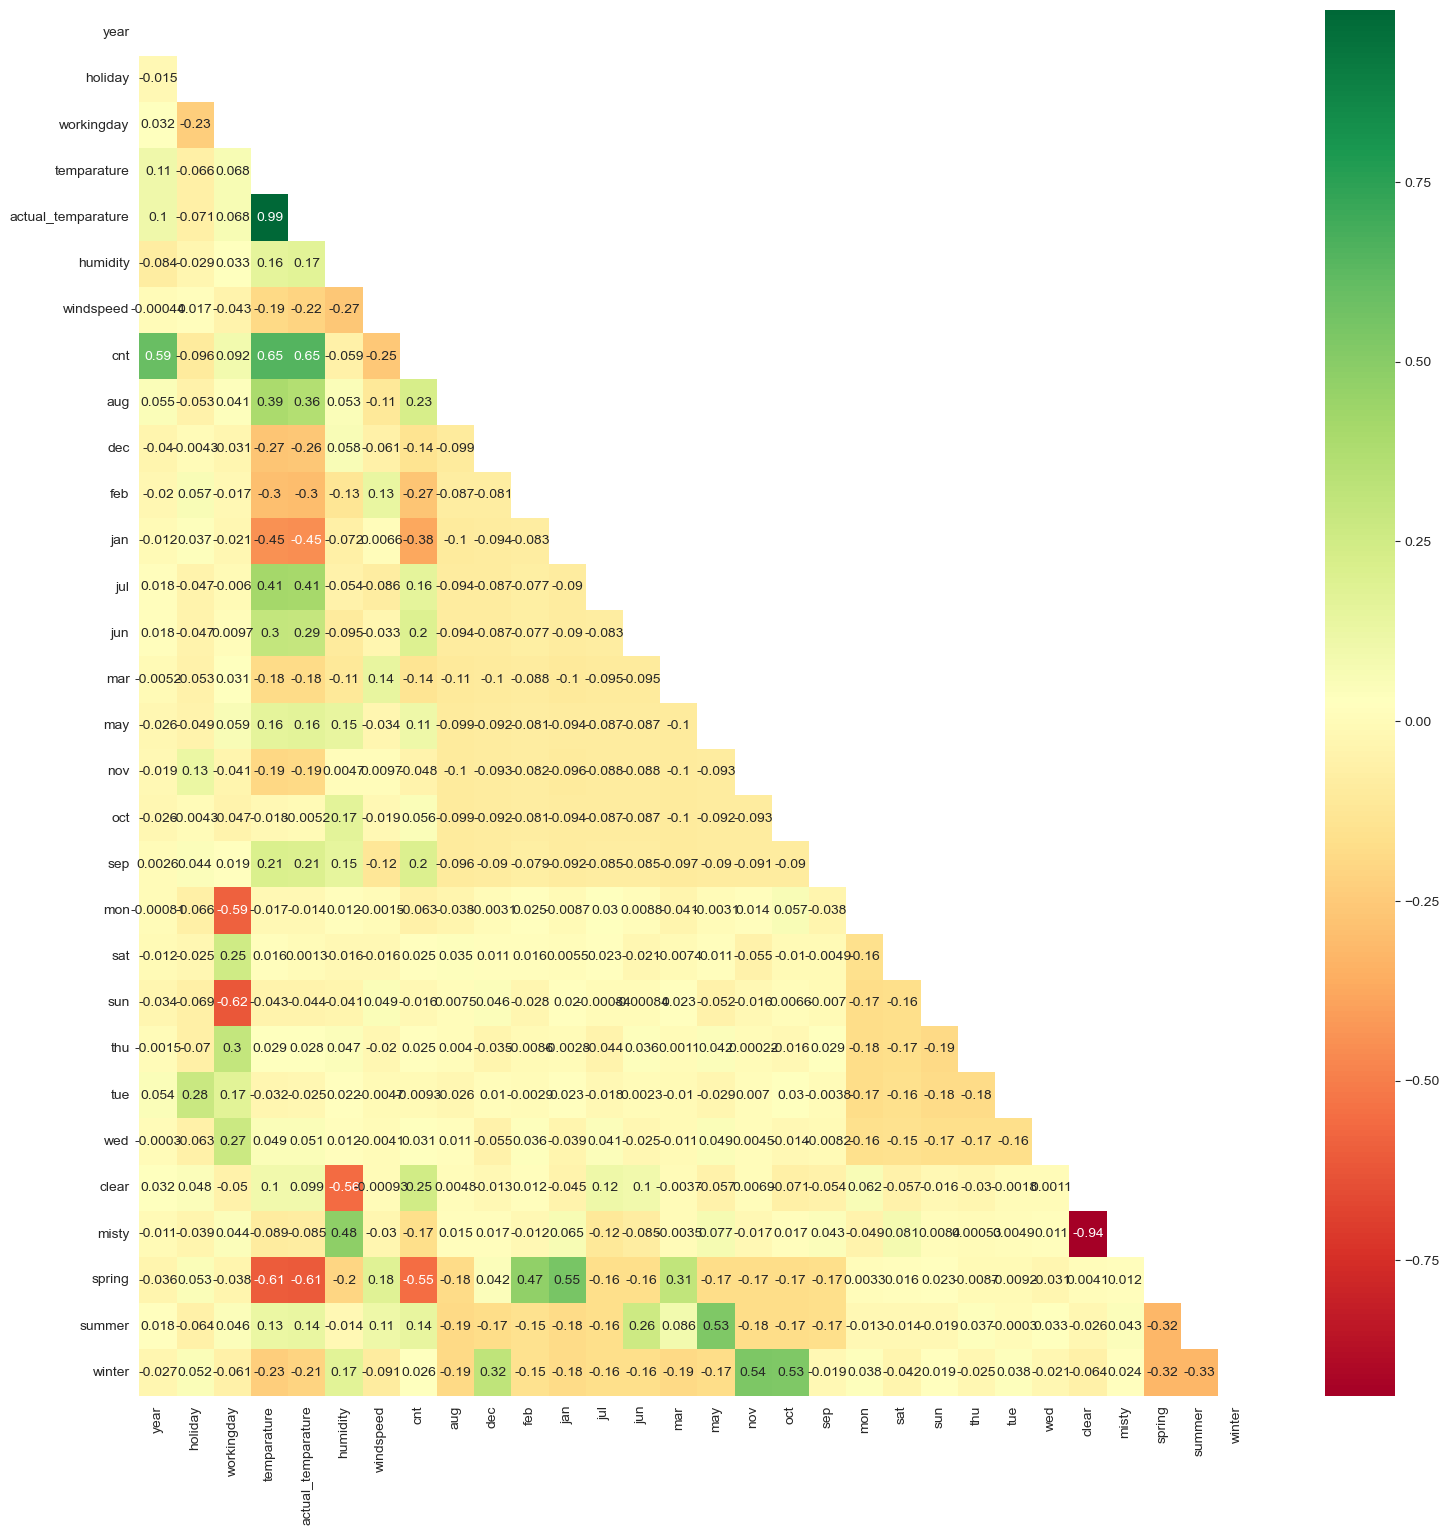

In [957]:
# visualize the correlation b/w the columns in training data set
plt.figure(figsize=(18,18))
matrix = np.triu(df_train.corr())
sns.heatmap(df_train.corr(), annot = True, cmap="RdYlGn", mask=matrix)
plt.show()

- count seems to have correlation with weather condition clear, weather summer and months of May, June , July and September

In [958]:
# Generic function to calculate VIF of variables

def calculateVIF(df):
    vif = pd.DataFrame()
    vif['Features'] = df.columns
    vif['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif 

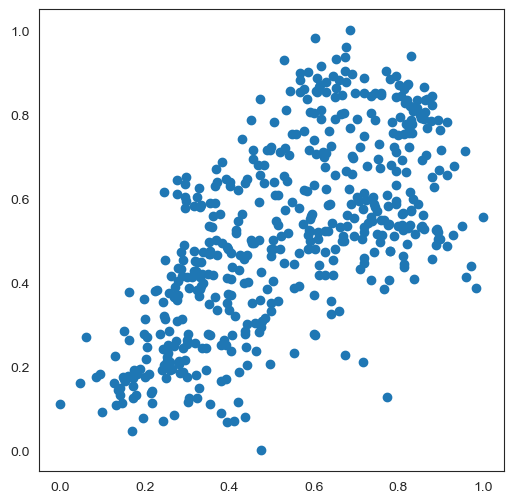

In [959]:
#Count seems to be having correlation with temparature and actual_temparature
plt.figure(figsize=[6,6])
plt.scatter(df_train.temparature, df_train.cnt)
plt.show()

In [960]:
# Taking out the target column count from the training dataset
y_train = df_train.pop('cnt')
X_train = df_train

# Step 5: Building a linear model

# RFE
### Recursive Feature Elemination

In [961]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [962]:
# Running RFE with output number of columns equal to 15
lm = LinearRegression()
lm.fit(X_train, y_train)
rfe = RFE(lm, step=15)
rfe = rfe.fit(X_train, y_train)

In [963]:
# Top 15 features to be used for further analysis
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('year', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temparature', True, 1),
 ('actual_temparature', False, 2),
 ('humidity', True, 1),
 ('windspeed', True, 1),
 ('aug', False, 2),
 ('dec', False, 2),
 ('feb', False, 2),
 ('jan', False, 2),
 ('jul', True, 1),
 ('jun', False, 2),
 ('mar', False, 2),
 ('may', False, 2),
 ('nov', False, 2),
 ('oct', False, 2),
 ('sep', True, 1),
 ('mon', True, 1),
 ('sat', False, 2),
 ('sun', True, 1),
 ('thu', False, 2),
 ('tue', False, 2),
 ('wed', False, 2),
 ('clear', True, 1),
 ('misty', True, 1),
 ('spring', True, 1),
 ('summer', False, 2),
 ('winter', True, 1)]

In [964]:
# Selected columns 
col=X_train.columns[rfe.support_]
col

Index(['year', 'holiday', 'workingday', 'temparature', 'humidity', 'windspeed',
       'jul', 'sep', 'mon', 'sun', 'clear', 'misty', 'spring', 'winter'],
      dtype='object')

In [965]:
# Not selected columns
X_train.columns[~rfe.support_]

Index(['actual_temparature', 'aug', 'dec', 'feb', 'jan', 'jun', 'mar', 'may',
       'nov', 'oct', 'sat', 'thu', 'tue', 'wed', 'summer'],
      dtype='object')

In [966]:
# Creating a dataframe of top 15 selected columns
X_train_rfe=X_train[col]

In [967]:
calculateVIF(X_train_rfe)

,Features,VIF
2,workingday,86.22
9,sun,20.27
8,mon,19.68
10,clear,10.23
11,misty,8.85
1,holiday,4.36
3,temparature,2.99
12,spring,2.55
4,humidity,1.89
13,winter,1.78


In [968]:
X_train_model_1=sm.add_constant(X_train_rfe)
ls=sm.OLS(y_train,X_train_model_1).fit()
print(ls.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     204.7
Date:                Tue, 11 Jul 2023   Prob (F-statistic):          9.38e-190
Time:                        23:23:10   Log-Likelihood:                 510.91
No. Observations:                 510   AIC:                            -993.8
Df Residuals:                     496   BIC:                            -934.5
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.0436      0.037      1.191      

In [969]:
# We can drop humidity variable as it has high p-value
X_train_rfe = X_train_rfe.drop(['humidity'], axis = 1)

# Run the function to calculate VIF for the new model
calculateVIF(X_train_rfe)

,Features,VIF
2,workingday,46.50
8,sun,11.42
7,mon,10.86
9,clear,8.65
10,misty,8.59
1,holiday,2.85
3,temparature,2.83
11,spring,2.53
12,winter,1.71
5,jul,1.28


In [970]:
X_train_model_2=sm.add_constant(X_train_rfe)
ls=sm.OLS(y_train,X_train_model_2).fit()
print(ls.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     214.3
Date:                Tue, 11 Jul 2023   Prob (F-statistic):          1.26e-187
Time:                        23:23:10   Log-Likelihood:                 503.06
No. Observations:                 510   AIC:                            -980.1
Df Residuals:                     497   BIC:                            -925.1
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -0.0531      0.028     -1.931      

In [971]:
# We can drop workingday variable as it has high VIF
X_train_rfe = X_train_rfe.drop(['workingday'], axis = 1)

# Run the function to calculate VIF for the new model
calculateVIF(X_train_rfe)

,Features,VIF
2,temparature,12.25
8,clear,11.55
9,misty,6.38
3,windspeed,4.25
10,spring,2.57
0,year,2.07
11,winter,1.71
4,jul,1.38
7,sun,1.23
6,mon,1.22


In [972]:
X_train_model_3=sm.add_constant(X_train_rfe)
ls=sm.OLS(y_train,X_train_model_3).fit()
print(ls.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     214.3
Date:                Tue, 11 Jul 2023   Prob (F-statistic):          1.26e-187
Time:                        23:23:10   Log-Likelihood:                 503.06
No. Observations:                 510   AIC:                            -980.1
Df Residuals:                     497   BIC:                            -925.1
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -0.0320      0.034     -0.954      

In [973]:
# We can drop workingday variable as it has high p value
X_train_rfe = X_train_rfe.drop(['sun'], axis = 1)

# Run the function to calculate VIF for the new model
calculateVIF(X_train_rfe)

,Features,VIF
2,temparature,12.25
7,clear,11.50
8,misty,6.35
3,windspeed,4.23
9,spring,2.57
0,year,2.07
10,winter,1.71
4,jul,1.38
5,sep,1.20
6,mon,1.18


In [974]:
X_train_model_4=sm.add_constant(X_train_rfe)
ls=sm.OLS(y_train,X_train_model_4).fit()
print(ls.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     233.6
Date:                Tue, 11 Jul 2023   Prob (F-statistic):          1.32e-188
Time:                        23:23:11   Log-Likelihood:                 502.54
No. Observations:                 510   AIC:                            -981.1
Df Residuals:                     498   BIC:                            -930.3
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -0.0299      0.033     -0.892      

In [975]:
calculateVIF(X_train_rfe)

,Features,VIF
2,temparature,12.25
7,clear,11.50
8,misty,6.35
3,windspeed,4.23
9,spring,2.57
0,year,2.07
10,winter,1.71
4,jul,1.38
5,sep,1.20
6,mon,1.18


The final model `ls` seems to giving good result  

In [976]:
X_train_model_4.columns

Index(['const', 'year', 'holiday', 'temparature', 'windspeed', 'jul', 'sep',
       'mon', 'clear', 'misty', 'spring', 'winter'],
      dtype='object')

# Step 6: Residual Analysis of the train data
So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [977]:
y_train_pred = ls.predict(X_train_model_4)

Text(0.5, 0, 'Errors')

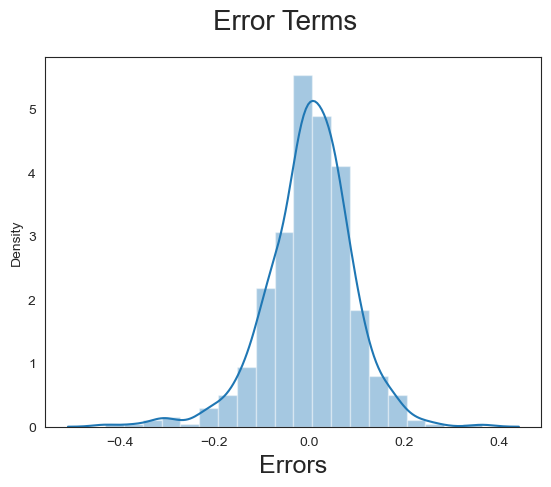

In [978]:
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20) 
plt.xlabel('Errors', fontsize = 18)


# Step 7: Making Predictions Using the Final Model

In [979]:
df_test[num_vars]=scaler.transform(df_test[num_vars])


In [980]:
df_test.head()

,year,holiday,workingday,temparature,actual_temparature,humidity,windspeed,cnt,aug,dec,...,sat,sun,thu,tue,wed,clear,misty,spring,summer,winter
184,0,1,0,0.831783,0.769660,0.657364,0.084219,0.692706,0,0,...,0,0,0,1,0,0,1,0,0,0
535,1,0,1,0.901354,0.842587,0.610133,0.153728,0.712034,0,0,...,0,0,1,0,0,1,0,0,1,0
299,0,0,1,0.511964,0.496145,0.837699,0.334206,0.303382,0,0,...,0,0,0,0,0,0,1,0,0,1
221,0,0,1,0.881625,0.795343,0.437098,0.339570,0.547400,1,0,...,0,0,1,0,0,1,0,0,0,0
152,0,0,1,0.817246,0.741471,0.314298,0.537414,0.569029,0,0,...,0,0,0,0,0,1,0,0,1,0


In [981]:
y_test = df_test.pop('cnt')
X_test = df_test


In [982]:
col1=X_train_rfe.columns
X_test = X_test[col1]

# Adding constant variable to test dataframe
X_test_lm = sm.add_constant(X_test)



In [983]:
y_pred = ls.predict(X_test_lm)

In [984]:
r2 = r2_score(y_test, y_pred)
round(r2,4)

0.8104

# Step 8: Model Evaluation

Text(0, 0.5, 'y_pred')

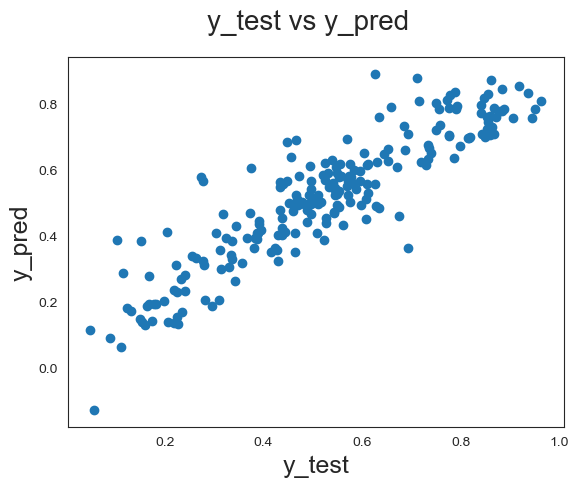

In [985]:
fig=plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred',fontsize=20)
plt.xlabel('y_test',fontsize=18)
plt.ylabel('y_pred',fontsize=18)

In [986]:
round(ls.params,4)

const         -0.0299
year           0.2342
holiday       -0.1057
temparature    0.4486
windspeed     -0.1393
jul           -0.0706
sep            0.0561
mon           -0.0477
clear          0.2907
misty          0.2091
spring        -0.1117
winter         0.0471
dtype: float64

The overall model looks good with an accuracy of ~81%